# Improving Data Visualizations

*Data visualizations are used to convey concepts and key takeaways from an analysis in a clear in succinct way. The best visualizations intentionally use color, ordering, size, and minimal text to convey those concepts to the reader faster. This is of particular importance for high dimensional datasets that will typically have more results that need to be communicated to a reader.* 

The purpose of this module is to build off of the [TAME Toolkit module 1.4](https://uncsrp.github.io/Data-Analysis-Training-Modules/high-dimensional-data-visualizations.html#high-dimensional-data-visualizations) and show how to improve the visualizations found in that module. 


### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [1]:
if (!requireNamespace("GGally"))
  install.packages("GGally");
if (!requireNamespace("superheat"))
  install.packages("superheat");
if (!requireNamespace("pheatmap"))
  install.packages("pheatmap");
if (!requireNamespace("viridis"))
  install.packages("viridis");

Loading required namespace: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required namespace: superheat

Loading required namespace: pheatmap

Loading required namespace: viridis



### Loading required R packages

In [2]:
library(ggplot2)
library(GGally)
library(superheat)
library(pheatmap)
library(corrplot)
library(tidyverse)
library(reshape2)
library(viridis)

corrplot 0.92 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: viridisLite



### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

### Importing example dataset
Then let's read in our example dataset. As mentioned in the introduction, this example dataset represents chemical measurements across 12 different biomass burn scenarios, representing potential wildfire events. Let's upload and view these data:

In [3]:
# Load the data
SmokeData1 <- read.csv("Input/ModuleData.csv")

# View the top of the dataset
head(SmokeData1) 

,Chemical.Category,Chemical,CASRN,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering,Units
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,n-Alkanes,2-Methylnonadecane,1560-86-7,0.06,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.13,0.06,ng_per_uL
2,n-Alkanes,3-Methylnonadecane,6418-45-7,0.04,0.04,0.90,1.13,0.72,0.04,0.04,0.47,0.77,0.04,ng_per_uL
3,n-Alkanes,Docosane,629-97-0,0.25,0.21,0.57,9.46,0.18,0.32,0.48,0.16,0.36,0.16,ng_per_uL
4,n-Alkanes,Dodecylcyclohexane,1795-17-1,0.04,0.04,0.04,0.25,0.04,0.12,0.04,0.04,0.04,0.04,ng_per_uL
5,n-Alkanes,Eicosane,112-95-8,0.25,0.11,0.54,7.55,0.16,0.28,0.29,0.17,0.38,0.15,ng_per_uL
6,n-Alkanes,Heneicosane,629-94-7,0.28,0.13,0.34,6.77,0.13,0.30,0.42,0.13,0.69,0.13,ng_per_uL


### Formatting dataframes for downstream visualization code
For some of the visualizations below (e.g., heat maps) we’ll use data from the original full dataframe. The only formatting that needs to be done to this dataframe is to move the chemical names to the row names position of the dataframe:

In [4]:
# Converting the chemical category column to row names
SmokeData1 = SmokeData1 %>%
    column_to_rownames(var = "Chemical")

# View the top of the reorganized dataset
head(SmokeData1)

,Chemical.Category,CASRN,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering,Units
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2-Methylnonadecane,n-Alkanes,1560-86-7,0.06,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.13,0.06,ng_per_uL
3-Methylnonadecane,n-Alkanes,6418-45-7,0.04,0.04,0.90,1.13,0.72,0.04,0.04,0.47,0.77,0.04,ng_per_uL
Docosane,n-Alkanes,629-97-0,0.25,0.21,0.57,9.46,0.18,0.32,0.48,0.16,0.36,0.16,ng_per_uL
Dodecylcyclohexane,n-Alkanes,1795-17-1,0.04,0.04,0.04,0.25,0.04,0.12,0.04,0.04,0.04,0.04,ng_per_uL
Eicosane,n-Alkanes,112-95-8,0.25,0.11,0.54,7.55,0.16,0.28,0.29,0.17,0.38,0.15,ng_per_uL
Heneicosane,n-Alkanes,629-94-7,0.28,0.13,0.34,6.77,0.13,0.30,0.42,0.13,0.69,0.13,ng_per_uL


In [5]:
# Creating a smaller dataframe to work with 
SmokeData2 = SmokeData1[,3:12]

# Viewing the dataframe
head(SmokeData2)

# scaling the data
ScaledData = t(scale(t(SmokeData2)))
head(ScaledData)

,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2-Methylnonadecane,0.06,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.13,0.06
3-Methylnonadecane,0.04,0.04,0.90,1.13,0.72,0.04,0.04,0.47,0.77,0.04
Docosane,0.25,0.21,0.57,9.46,0.18,0.32,0.48,0.16,0.36,0.16
Dodecylcyclohexane,0.04,0.04,0.04,0.25,0.04,0.12,0.04,0.04,0.04,0.04
Eicosane,0.25,0.11,0.54,7.55,0.16,0.28,0.29,0.17,0.38,0.15
Heneicosane,0.28,0.13,0.34,6.77,0.13,0.30,0.42,0.13,0.69,0.13


,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering
2-Methylnonadecane,-0.3347765,-0.3347765,-0.3347765,2.841935,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.1637228,-0.3347765
3-Methylnonadecane,-0.8794448,-0.8794448,1.1161291,1.649829,0.6984509,-0.8794448,-0.8794448,0.1183422,0.8144726,-0.8794448
Docosane,-0.3327216,-0.3465132,-0.2223890,2.842787,-0.3568568,-0.3085863,-0.2534201,-0.3637526,-0.2947948,-0.3637526
Dodecylcyclohexane,-0.4240624,-0.4240624,-0.4240624,2.646734,-0.4240624,0.7457649,-0.4240624,-0.4240624,-0.4240624,-0.4240624
Eicosane,-0.3195928,-0.3802202,-0.1940076,2.841691,-0.3585675,-0.3066012,-0.3022707,-0.3542370,-0.2632960,-0.3628981
Heneicosane,-0.3166775,-0.3895328,-0.2875354,2.835527,-0.3895328,-0.3069635,-0.2486793,-0.3895328,-0.1175398,-0.3895328


In [6]:
# Melting the data, which converts the data into a longer format 
ScaledData.melt <- melt(ScaledData)

# Updating the column names
colnames(ScaledData.melt) <- c("Chemical", "Biomass_Burn_Condition", 
                               "Scaled_Chemical_Concentration") 
head(ScaledData.melt)

,Chemical,Biomass_Burn_Condition,Scaled_Chemical_Concentration
,<fct>,<fct>,<dbl>
1,2-Methylnonadecane,EucalyptusFlaming,-0.3347765
2,3-Methylnonadecane,EucalyptusFlaming,-0.8794448
3,Docosane,EucalyptusFlaming,-0.3327216
4,Dodecylcyclohexane,EucalyptusFlaming,-0.4240624
5,Eicosane,EucalyptusFlaming,-0.3195928
6,Heneicosane,EucalyptusFlaming,-0.3166775


# Boxplot Visualizations

### Original Version from TAME Module 1.4

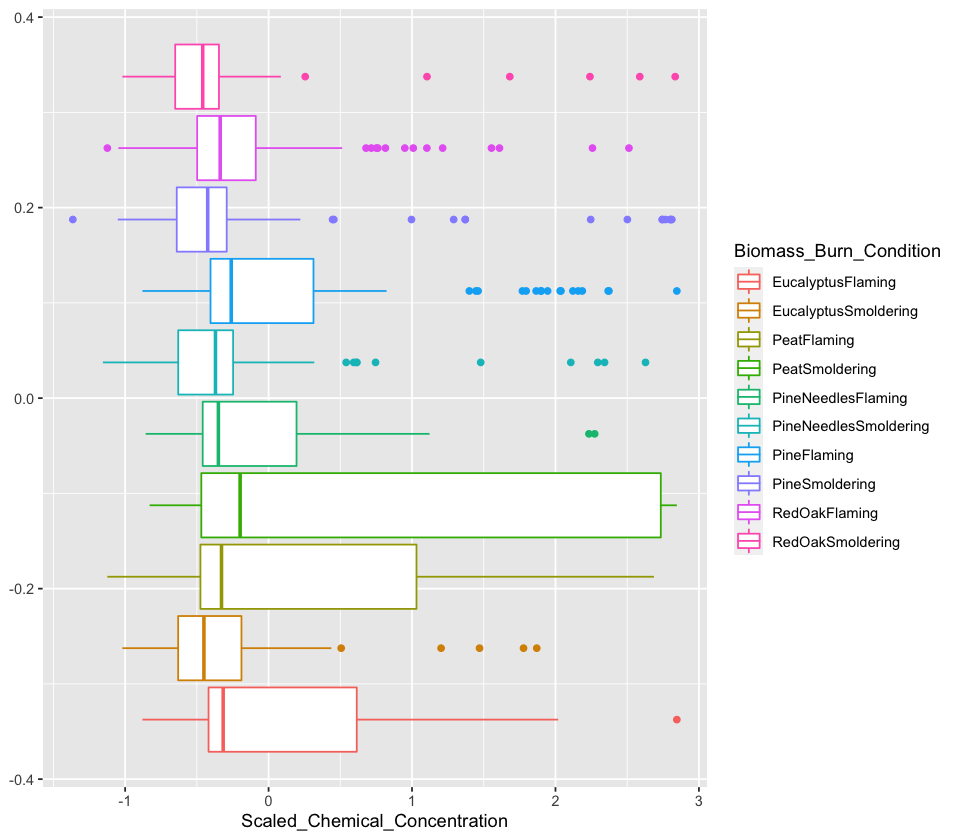

In [7]:
options(repr.plot.width=8, repr.plot.height=7) #changing size
ggplot(data = ScaledData.melt, aes(x = Scaled_Chemical_Concentration, color = Biomass_Burn_Condition)) + 
  geom_boxplot()

### There are three main aspects we can adjust on this figure:
 > 1. The order of the box plots.
 
- Ordering the biomass burn conditions using the median scaled chemical concentration allows the reader to easily determine the biomass burn conditions that had the greatest or least chemical concentrations relative to each other. In R, this can be done by putting the biomass_burn_condition variable into a factor.
      
> 2. The legibility of the text in legend and axes.
- Creating spaces between the text or exchanging the underscores for spaces improves the legibility of the figure. 
     
> 3. Use of color.
- In figures variables can be visualized using color, text, size, etc. In this figure, it is redundant to have the biomass burn condition encoded in the legend and the color. Instead this variable can be put on the y axis and the legend will be removed to improve conciseness. 

In [8]:
# First adding spaces beteween the biomass burn conditions
ScaledData.melt.spaces = ScaledData.melt %>%
    mutate(Biomass_Burn_Condition = ifelse(Biomass_Burn_Condition =="RedOakSmoldering", "Red Oak Smoldering",
                ifelse(Biomass_Burn_Condition =="RedOakFlaming", "Red Oak Flaming",
                    ifelse(Biomass_Burn_Condition =="EucalyptusSmoldering", "Eucalyptus Smoldering",
                        ifelse(Biomass_Burn_Condition =="EucalyptusFlaming", "Eucalyptus Flaming",
                            ifelse(Biomass_Burn_Condition =="PineSmoldering", "Pine Smoldering",
                                ifelse(Biomass_Burn_Condition =="PineFlaming", "Pine Flaming",
                                    ifelse(Biomass_Burn_Condition =="PineNeedlesSmoldering", "Pine Needles Smoldering",
                                        ifelse(Biomass_Burn_Condition =="PineNeedlesFlaming", "Pine Needles Flaming",
                                            ifelse(Biomass_Burn_Condition =="PeatSmoldering", "Peat Smoldering",
                                                  ifelse(Biomass_Burn_Condition =="PeatFlaming", "Peat Flaming",
                                                         NA)))))))))))
# Viewing dataframe
head(ScaledData.melt.spaces)

,Chemical,Biomass_Burn_Condition,Scaled_Chemical_Concentration
,<fct>,<chr>,<dbl>
1,2-Methylnonadecane,Eucalyptus Flaming,-0.3347765
2,3-Methylnonadecane,Eucalyptus Flaming,-0.8794448
3,Docosane,Eucalyptus Flaming,-0.3327216
4,Dodecylcyclohexane,Eucalyptus Flaming,-0.4240624
5,Eicosane,Eucalyptus Flaming,-0.3195928
6,Heneicosane,Eucalyptus Flaming,-0.3166775


In [9]:
# Factor the biomass_burn_condition by the median scaled_chemical_concentration
median_concentration_data = ScaledData.melt.spaces %>%
    group_by(Biomass_Burn_Condition) %>%
    summarize(Median_Concentration = median(Scaled_Chemical_Concentration)) %>%
    arrange(Median_Concentration)

head(median_concentration_data)

# Saving that order
median_biomass_order = median_concentration_data$Biomass_Burn_Condition

Biomass_Burn_Condition,Median_Concentration
<chr>,<dbl>
Red Oak Smoldering,-0.4590961
Eucalyptus Smoldering,-0.4508589
Pine Smoldering,-0.4244289
Pine Needles Smoldering,-0.3702707
Pine Needles Flaming,-0.3498902
Red Oak Flaming,-0.3373308


### Improved Version

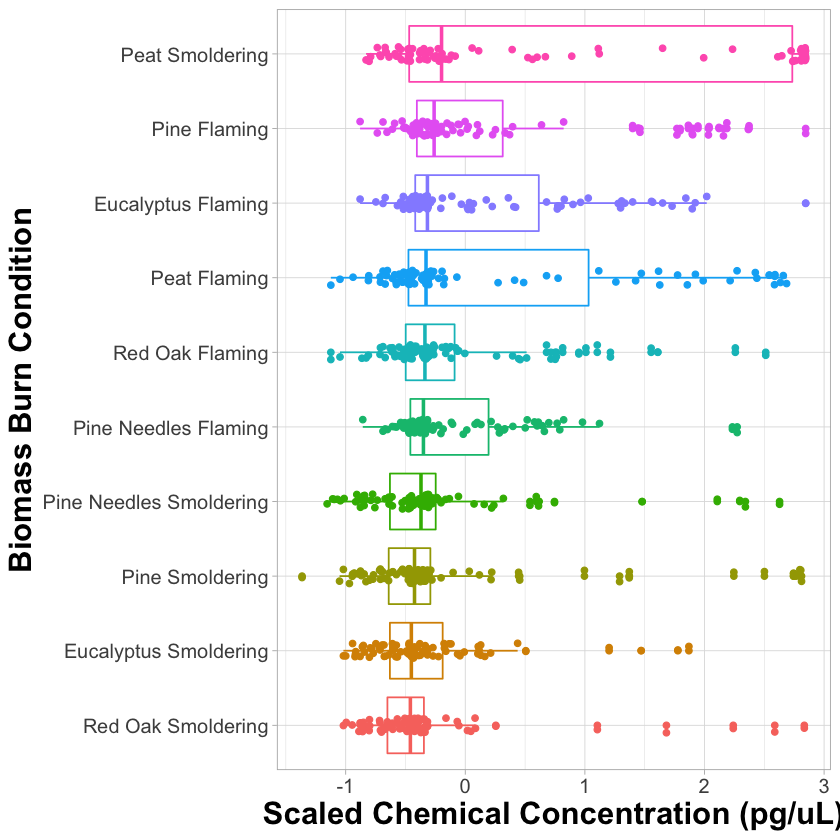

In [10]:
options(repr.plot.width=7, repr.plot.height=7) #changing size
# putting into factor to organize the burn conditions
ScaledData.melt.spaces$Biomass_Burn_Condition = factor(ScaledData.melt.spaces$Biomass_Burn_Condition, levels = median_biomass_order)

ggplot(data = ScaledData.melt.spaces, aes(x = Scaled_Chemical_Concentration, y = Biomass_Burn_Condition, 
                                   color = Biomass_Burn_Condition)) + 
  geom_boxplot() +
  geom_point(position = position_jitter(h = 0.1), alpha = 1) + 

  theme_light() + # changing the theme
  theme(axis.text = element_text(size = 12), # changing size of x axis labels
      axis.title = element_text(face = "bold", size = rel(1.7)), # changes axis titles
      legend.position = "none") + # changes legend text

  # making the the axis and legend labels more legible
  xlab('Scaled Chemical Concentration (pg/uL)') + ylab('Biomass Burn Condition') + # changing axis labels 
  scale_color_discrete(name = "Biomass Burn Condition")

You many notice that the scaled chemical concentration was put on the x axis and burn condition was put on the y axis and not vice versa. This was done, so the biomass names could placed horizontally and thus read easier than if they were on the x axis.

### Additional Resources
- https://blog.datawrapper.de/colorguide/
- https://ggplot2-book.org/